# Used car price prediction Using XGBoost

## TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.

import warnings
warnings.filterwarnings("ignore")


In [6]:
# Read the CSV file 
car_df = pd.read_csv('cars_data.csv')

In [7]:
# Load the top 10 instances
car_df.head(10)

Make                    Model    Type  Origin DriveTrain     MSRP  \
0  Acura                      MDX     SUV    Asia        All  $36,945   
1  Acura           RSX Type S 2dr   Sedan    Asia      Front  $23,820   
2  Acura                  TSX 4dr   Sedan    Asia      Front  $26,990   
3  Acura                   TL 4dr   Sedan    Asia      Front  $33,195   
4  Acura               3.5 RL 4dr   Sedan    Asia      Front  $43,755   
5  Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  $46,100   
6  Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  $89,765   
7   Audi              A4 1.8T 4dr   Sedan  Europe      Front  $25,940   
8   Audi   A41.8T convertible 2dr   Sedan  Europe      Front  $35,940   
9   Audi               A4 3.0 4dr   Sedan  Europe      Front  $31,840   

   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  $33,337         3.5        6.0         265        17           23    4451   
1  $21,761         2.0        4.0         200        24           31    2778   
2  $24,647         2.4        4.0         200        22           29    3230   
3  $30,299         3.2        6.0         270        20           28    3575   
4  $39,014         3.5        6.0         225        18           24    3880   
5  $41,100         3.5        6.0         225        18           24    3893   
6  $79,978         3.2        6.0         290        17           24    3153   
7  $23,508         1.8        4.0         170        22           31    3252   
8  $32,506         1.8        4.0         170        23           30    3638   
9  $28,846         3.0        6.0         220        20           28    3462   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
5        115     197  
6        100     174  
7        104     179  
8        105     180  
9        104     179

In [8]:
# Load the bottom 10 instances 
car_df.tail(10)

Make                    Model   Type  Origin DriveTrain     MSRP  \
418  Volvo              S60 2.5 4dr  Sedan  Europe        All  $31,745   
419  Volvo               S60 T5 4dr  Sedan  Europe      Front  $34,845   
420  Volvo                S60 R 4dr  Sedan  Europe        All  $37,560   
421  Volvo              S80 2.9 4dr  Sedan  Europe      Front  $37,730   
422  Volvo             S80 2.5T 4dr  Sedan  Europe        All  $37,885   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
418  $29,916         2.5        5.0         208        20           27   
419  $32,902         2.3        5.0         247        20           28   
420  $35,382         2.5        5.0         300        18           25   
421  $35,542         2.9        6.0         208        20           28   
422  $35,688         2.5        5.0         194        20           27   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
418    3903        107     180  
419    3766        107     180  
420    3571        107     181  
421    3576        110     190  
422    3691        110     190  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [9]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [10]:
# Check the shape of the dataframe
car_df.shape

(428, 15)

In [15]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [14]:
# Obtain the summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [16]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns

car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

In [17]:
car_df["MSRP"]

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 428, dtype: int32

MINI CHALLENGE #1:
- Repeat the same procedure for the invoice column

In [19]:
car_df["Invoice"] = car_df["Invoice"].str.replace("$", "")
car_df["Invoice"] = car_df["Invoice"].str.replace(",", "")
car_df["Invoice"] = car_df["Invoice"].astype(int)

In [20]:
# Let's view the updated MSRP and Invoice Columns
car_df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [21]:
# Display the updated summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int32  
 6   Invoice      428 non-null    int32  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 46.9+ KB


MINI CHALLENGE #2:

- What is the maximum price of the used car?
- What is the minimum price of the used car?

In [22]:
price_max = car_df['MSRP'].max()
price_min = car_df['MSRP'].min()

print(f'What is the maximum price of the used car? ${price_max}')
print(f'What is the minimum price of the used car? ${price_min}')

What is the maximum price of the used car? $192465
What is the minimum price of the used car? $10280


# TASK #3: PERFORM DATA VISUALIZATION - PART #1

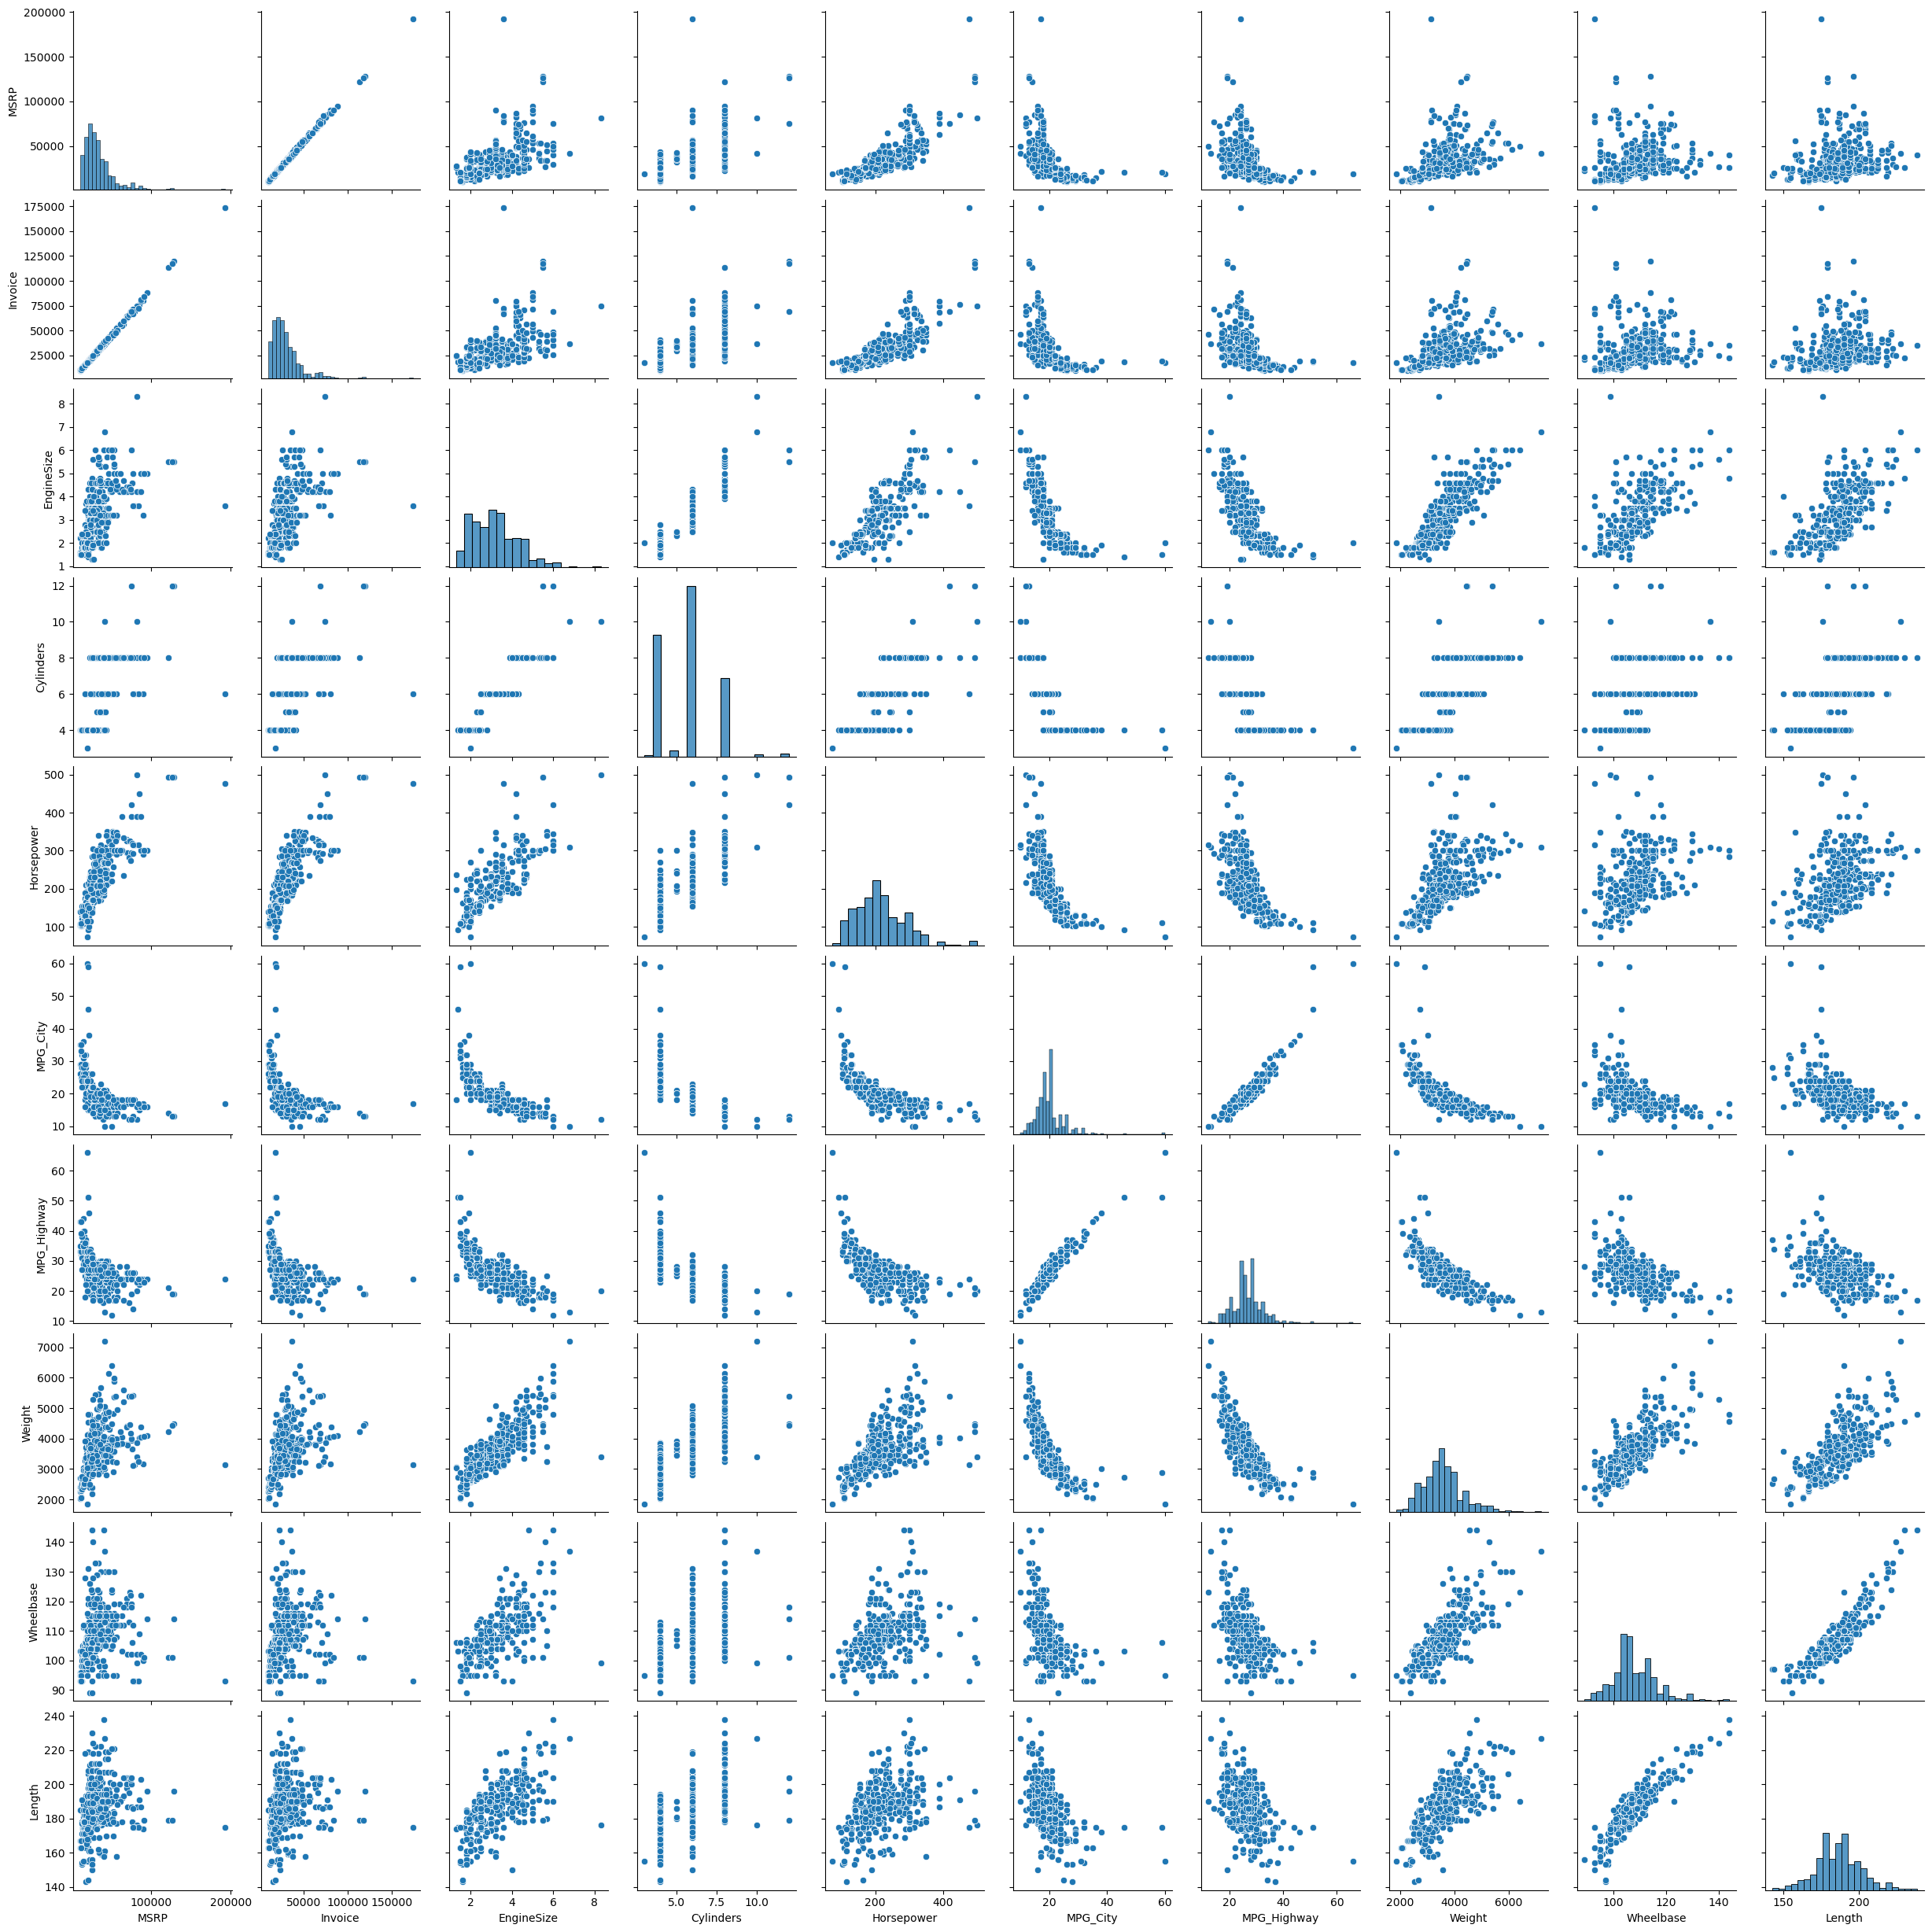

In [23]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(data = car_df)

In [28]:
# Let's view various makes of the cars
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [29]:
fig = px.histogram(car_df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show()

In [30]:
# Let's view various types of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [31]:
fig = px.histogram(car_df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [32]:
# Let's plot the location
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [33]:
fig = px.histogram(car_df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [34]:
# Let's view the drivetrain of the cars
car_df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [35]:
fig = px.histogram(car_df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [36]:
# Plot the make of the car and its location
fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

MINI CHALLENGE #3:

- Plot the plotly histogram of Make and Type of the car
- Find out which manufacturer has high number of Sports type 
- Find out which manufacturers has Hybrid

In [37]:
fig = px.histogram(car_df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE AND TYPE OF THE CAR",
                  opacity = 1)
                  
fig.show()

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

In [38]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [39]:
car_df

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[428 rows x 15 columns]

In [40]:
text = car_df.Model.values

In [41]:
stopwords = set(STOPWORDS)

In [42]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

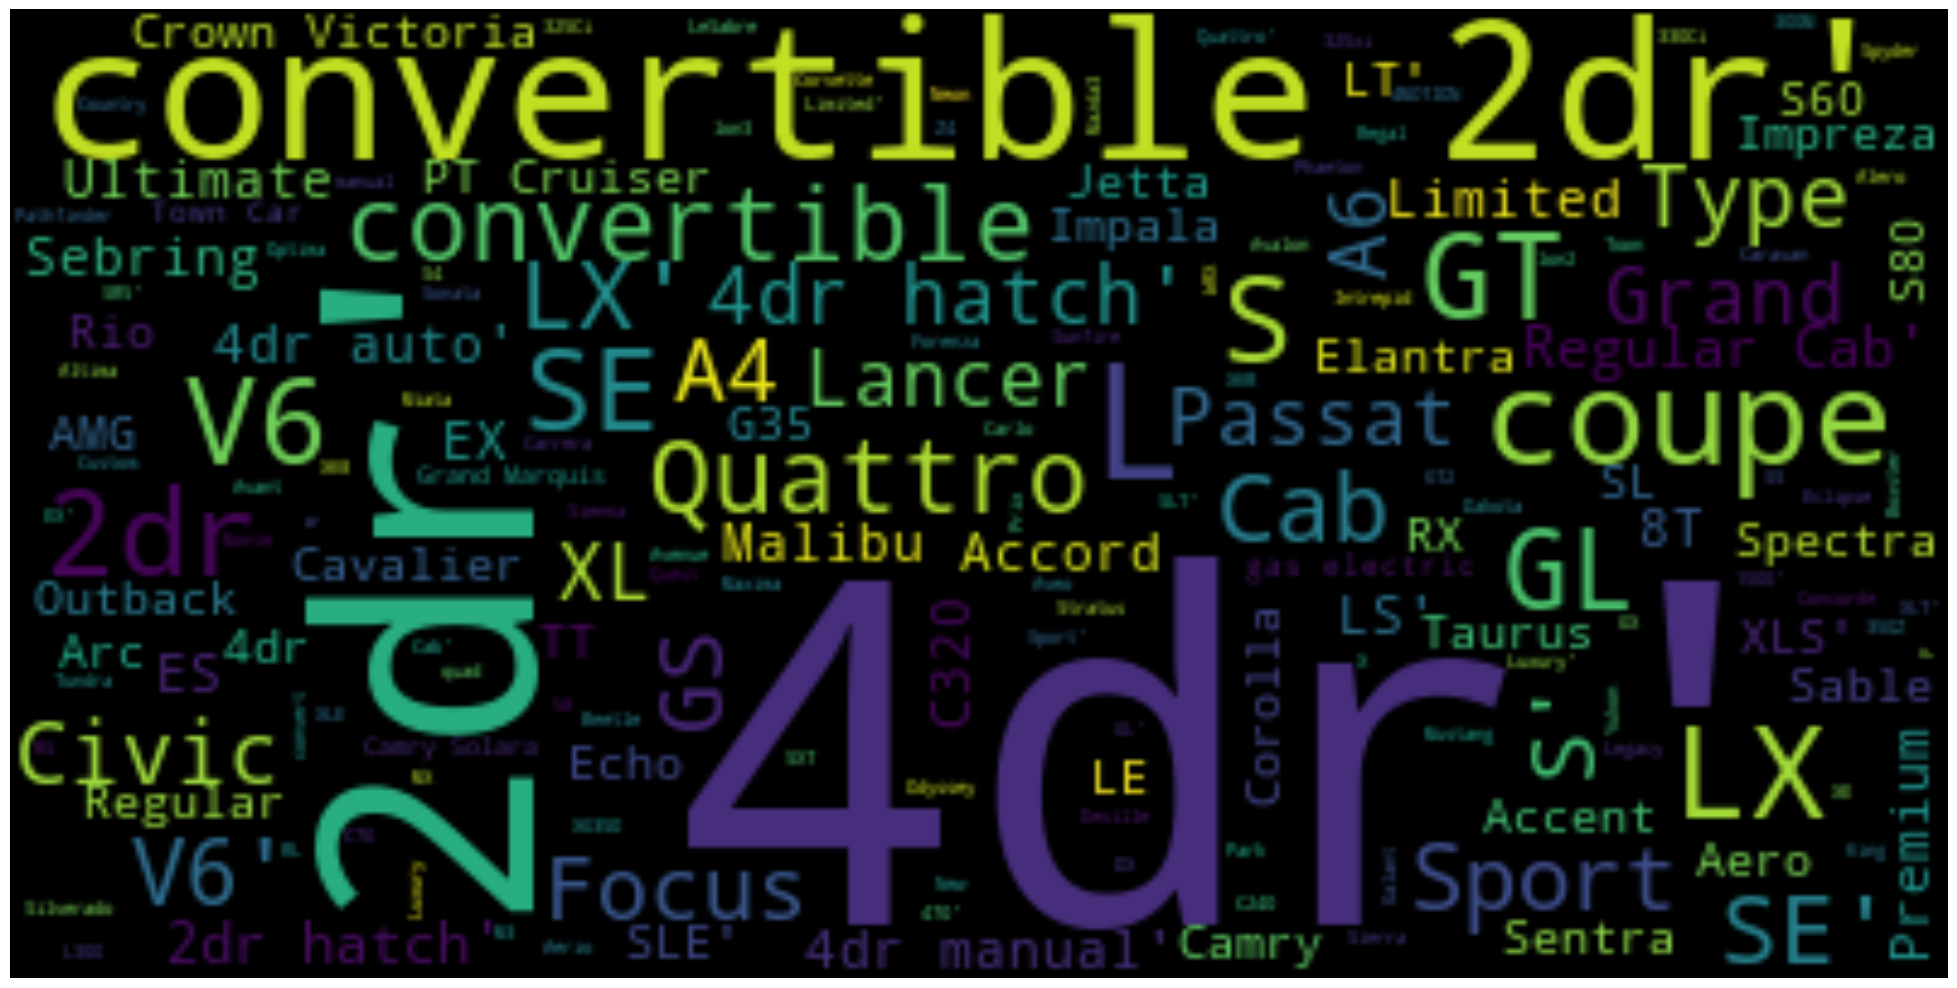

In [43]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [44]:
# Obtain the correlation matrix
car_df.corr()

MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.571753   0.649742    0.826945 -0.475020   
Invoice      0.999132  1.000000    0.564498   0.645226    0.823746 -0.470442   
EngineSize   0.571753  0.564498    1.000000   0.908002    0.787435 -0.709471   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.826945  0.823746    0.787435   0.810341    1.000000 -0.676699   
MPG_City    -0.475020 -0.470442   -0.709471  -0.684402   -0.676699  1.000000   
MPG_Highway -0.439622 -0.434585   -0.717302  -0.676100   -0.647195  0.941021   
Weight       0.448426  0.442332    0.807867   0.742209    0.630796 -0.737966   
Wheelbase    0.152000  0.148328    0.636517   0.546730    0.387398 -0.507284   
Length       0.172037  0.166586    0.637448   0.547783    0.381554 -0.501526   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.439622  0.448426   0.152000  0.172037  
Invoice        -0.434585  0.442332   0.148328  0.166586  
EngineSize     -0.717302  0.807867   0.636517  0.637448  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647195  0.630796   0.387398  0.381554  
MPG_City        0.941021 -0.737966  -0.507284 -0.501526  
MPG_Highway     1.000000 -0.790989  -0.524661 -0.466092  
Weight         -0.790989  1.000000   0.760703  0.690021  
Wheelbase      -0.524661  0.760703   1.000000  0.889195  
Length         -0.466092  0.690021   0.889195  1.000000

<Axes: >

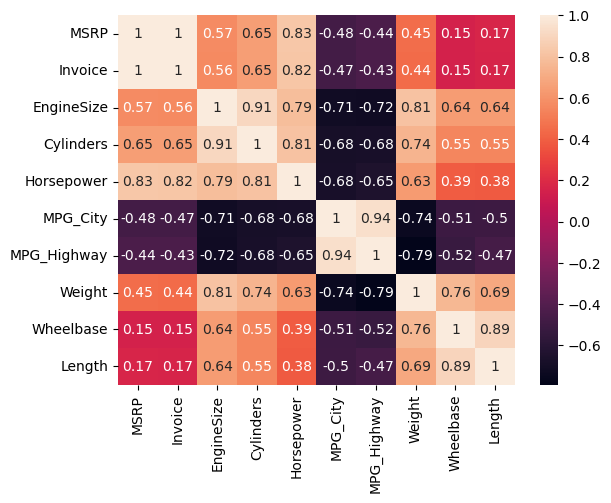

In [48]:
sns.heatmap(car_df.corr(),annot=True)

MINI CHALLENGE #4: 
- Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?

In [ ]:
# Resp. Invoice = Bastante óbvio

# TASK #5: PREPARE THE DATA BEFORE MODEL TRAINING

In [49]:
car_df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [50]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(car_df,columns=['Make','Model','Type','Origin','DriveTrain'])

In [51]:
df_dum

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    36945    33337         3.5        6.0         265        17           23   
1    23820    21761         2.0        4.0         200        24           31   
2    26990    24647         2.4        4.0         200        22           29   
3    33195    30299         3.2        6.0         270        20           28   
4    43755    39014         3.5        6.0         225        18           24   
..     ...      ...         ...        ...         ...       ...          ...   
423  40565    38203         2.4        5.0         197        21           28   
424  42565    40083         2.3        5.0         242        20           26   
425  45210    42573         2.9        6.0         268        19           26   
426  26135    24641         1.9        4.0         170        22           29   
427  35145    33112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  ...  Type_Sedan  Type_Sports  Type_Truck  \
0      4451        106     189  ...           0            0           0   
1      2778        101     172  ...           1            0           0   
2      3230        105     183  ...           1            0           0   
3      3575        108     186  ...           1            0           0   
4      3880        115     197  ...           1            0           0   
..      ...        ...     ...  ...         ...          ...         ...   
423    3450        105     186  ...           1            0           0   
424    3450        105     186  ...           1            0           0   
425    3653        110     190  ...           1            0           0   
426    2822        101     180  ...           0            0           0   
427    3823        109     186  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[428 rows x 485 columns]

In [52]:
# Invoice feature does not contribute to car price prediction
df_data = df_dum.drop(['Invoice'], axis=1)

In [53]:
df_data

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0    36945         3.5        6.0         265        17           23    4451   
1    23820         2.0        4.0         200        24           31    2778   
2    26990         2.4        4.0         200        22           29    3230   
3    33195         3.2        6.0         270        20           28    3575   
4    43755         3.5        6.0         225        18           24    3880   
..     ...         ...        ...         ...       ...          ...     ...   
423  40565         2.4        5.0         197        21           28    3450   
424  42565         2.3        5.0         242        20           26    3450   
425  45210         2.9        6.0         268        19           26    3653   
426  26135         1.9        4.0         170        22           29    2822   
427  35145         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0          106     189           1  ...           0            0           0   
1          101     172           1  ...           1            0           0   
2          105     183           1  ...           1            0           0   
3          108     186           1  ...           1            0           0   
4          115     197           1  ...           1            0           0   
..         ...     ...         ...  ...         ...          ...         ...   
423        105     186           0  ...           1            0           0   
424        105     186           0  ...           1            0           0   
425        110     190           0  ...           1            0           0   
426        101     180           0  ...           0            0           0   
427        109     186           0  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[428 rows x 484 columns]

In [54]:
df_data.shape

(428, 484)

In [71]:
df_data.isnull().sum()

MSRP                0
EngineSize          0
Cylinders           2
Horsepower          0
MPG_City            0
                   ..
Origin_Europe       0
Origin_USA          0
DriveTrain_All      0
DriveTrain_Front    0
DriveTrain_Rear     0
Length: 484, dtype: int64

In [74]:
df_data['Cylinders'].fillna(value=df_data['Cylinders'].median(),inplace=True)
df_data.isnull().sum()

MSRP                0
EngineSize          0
Cylinders           0
Horsepower          0
MPG_City            0
                   ..
Origin_Europe       0
Origin_USA          0
DriveTrain_All      0
DriveTrain_Front    0
DriveTrain_Rear     0
Length: 484, dtype: int64

In [75]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [76]:
X = np.array(X)

In [77]:
y = np.array(y)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

MINI CHALLENGE #5:

- Verify that the split was successful 

In [80]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(342, 483) (86, 483) (342,) (86,)


# TASK #5: TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [82]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [83]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8515737602732842

# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS 

In [84]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [85]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.7403610843216757

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
RandomForest_model=RandomForestRegressor(max_depth=5, n_estimators=5)
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [88]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7639394712841832

# TASK #7: TRAIN AN XG-BOOST REGRESSOR MODEL

In [89]:
from xgboost import XGBRegressor

In [92]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1,monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=0, max_depth=6, max_leaves=None, min_child_weight=1,
             missing=nan, monotone_constraints='()', multi_strategy=None,
             n_estimators=100, n_jobs=2, num_parallel_tree=1, ...)

In [93]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.872512525751391

MINI CHALLENGE #6:

- Which regressor performed best?

In [94]:
print("Regressão Linear ",accuracy_LinearRegression)
print("Decision Tree ",accuracy_DecisionTree)
print("Random Forest ",accuracy_RandomForest)
print("XGBoost ",accuracy_XGBoost)

Regressão Linear  0.8515737602732842
Decision Tree  0.7403610843216757
Random Forest  0.7639394712841832
XGBoost  0.872512525751391


# TASK #9: COMPARE MODELS AND CALCULATE REGRESSION KPIs

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

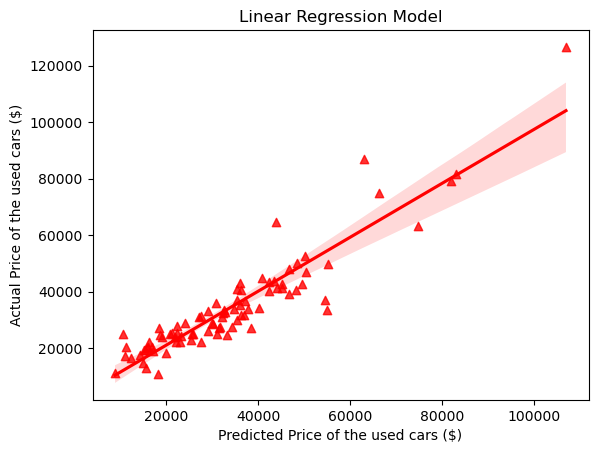

In [96]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(x=y_predict_linear, y=y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [97]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6932.766 
MSE = 48063242.550466545 
MAE = 4980.019035332085 
R2 = 0.8515737602732842


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

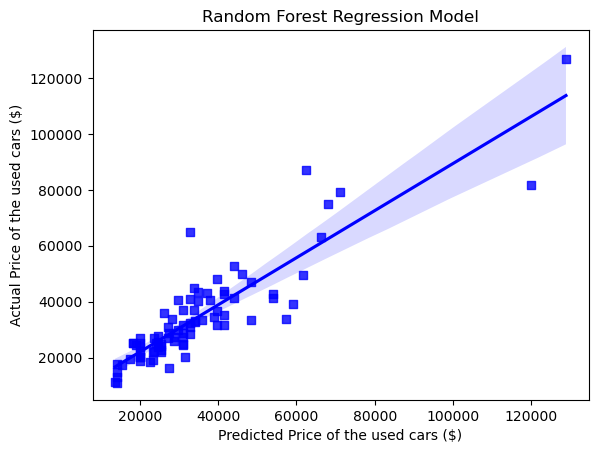

In [98]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [99]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 8743.048 
MSE = 76440893.9359359 
MAE = 5708.951145228071 
R2 = 0.7639394712841832


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

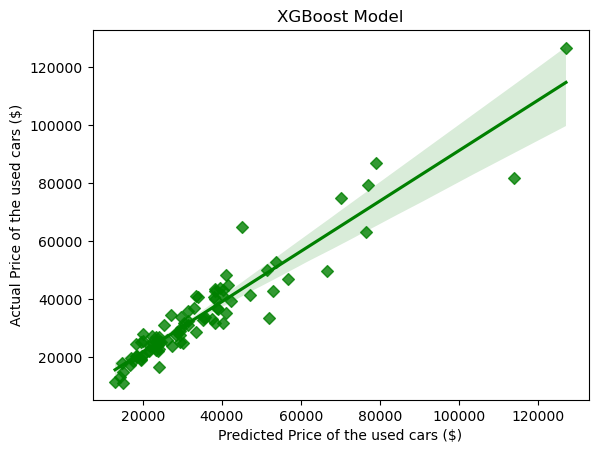

In [100]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")